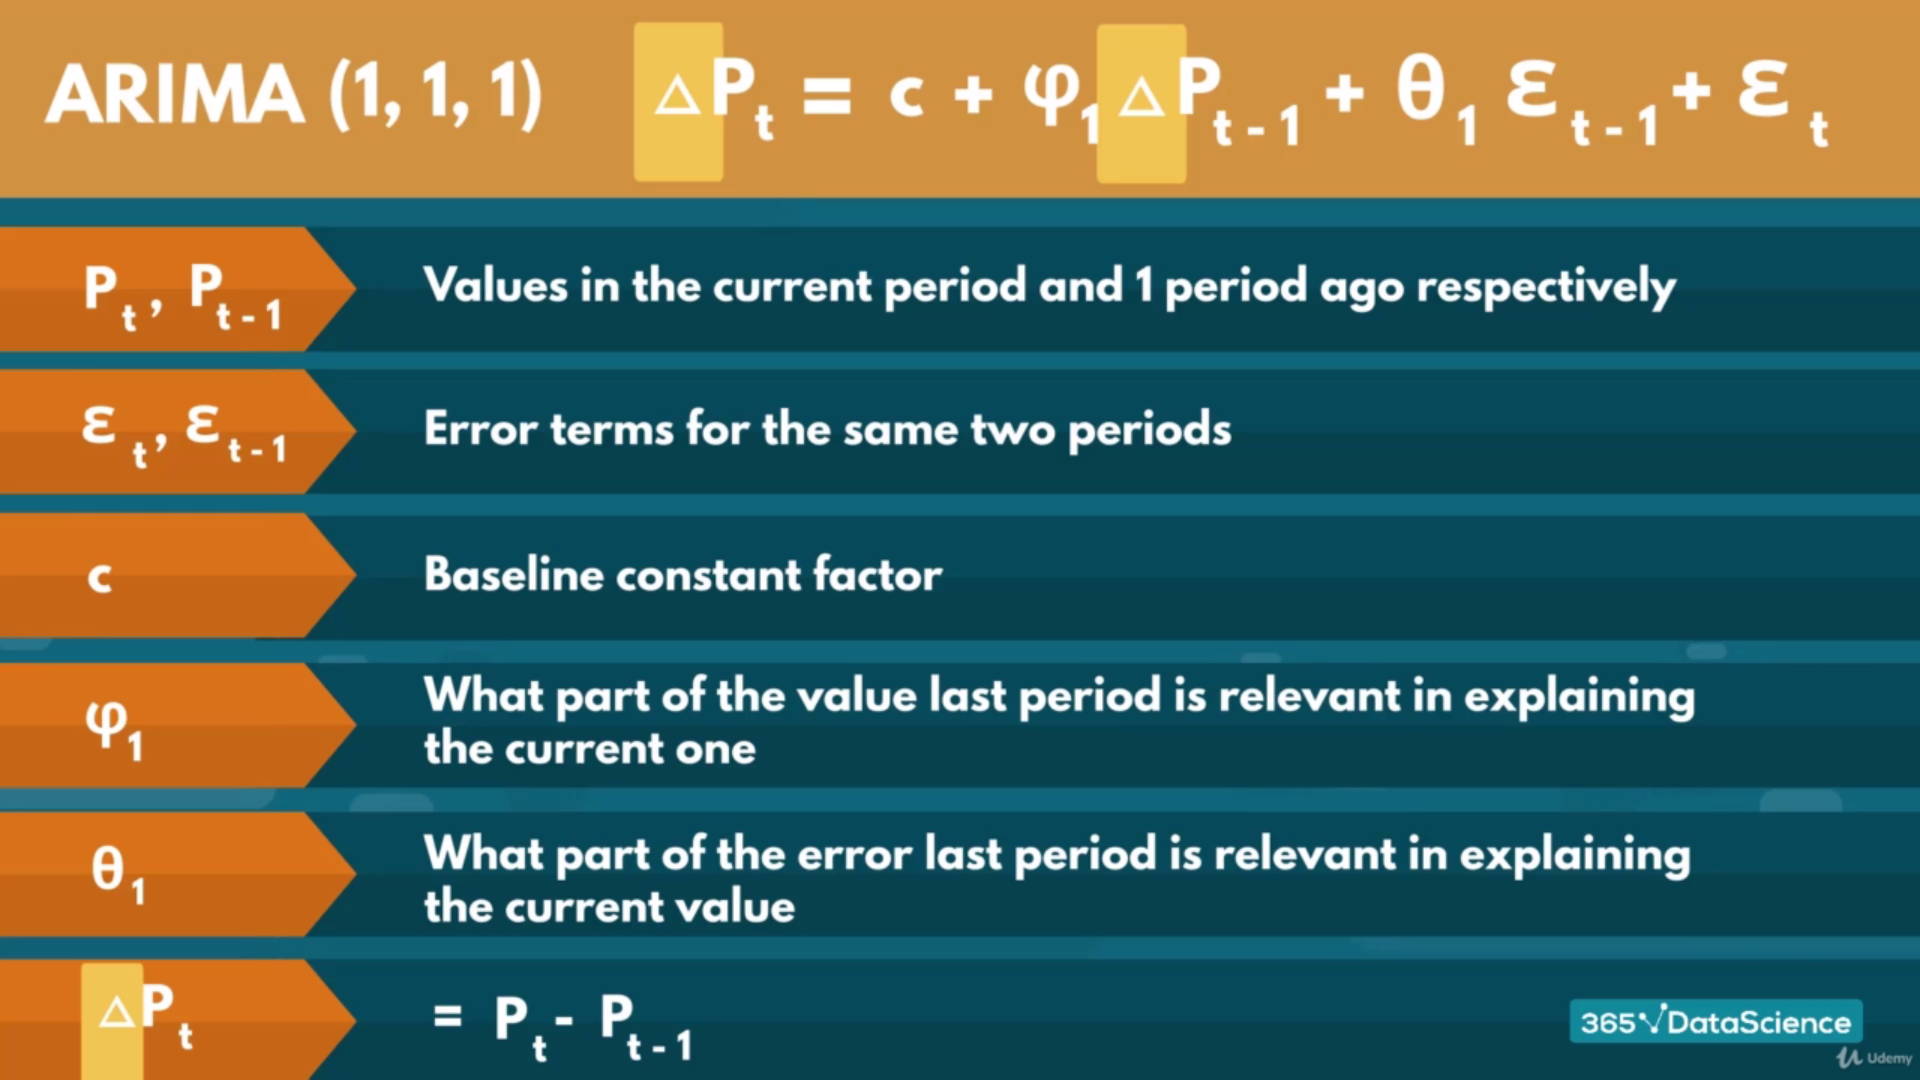

The ARIMA(p,d,q) model is nothing but fitting the ARMA(p,q) model to a newly generated time-series which is stationary,
although it may require some number of d integrations.

Also ARIMA doesn't have ACF and PACF.
So examine the acf of residuals to get the feel which lags to choose.
> For any integration we loose an observation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA,ARIMA
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [40]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [41]:
df_comp['market_value'] = df_comp.ftse

In [42]:
# del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [43]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df.head()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,spx,market_value,returns
date,,,
1994-01-07,469.90,3445.98,NaN
1994-01-10,475.27,3440.58,-0.156704
1994-01-11,474.13,3413.77,-0.779229
1994-01-12,474.17,3372.02,-1.222988
1994-01-13,472.47,3360.01,-0.356166


In [44]:
def LLR_test(mod_1,mod_2, df=1):
    l1 = mod_1.fit().llf
    l2 = mod_2.fit().llf
    LR = (2*(l2-l1))
    p = chi2.sf(LR,df).round(3)
    return p

In [45]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 05 Apr 2021   AIC                          55215.333
Time:                        12:24:59   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5656      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.651      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.377      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3379           +0.0000j            1.3379            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
# An arima(p,d,q) model will have the same number of parameters as its counter part arma(p,q)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


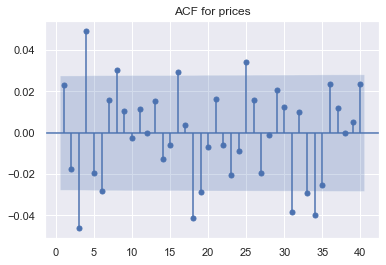

In [47]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], adjusted=True, zero=False, lags=40)
plt.title("ACF for prices")
plt.show()

In [48]:
# Now let's test high level arima models

In [49]:
# the third and fourth lags are highly significant, hence try all the ar and ma models upto 4th lag, 
# we find arima(1,1,2),113,211,311,312 proved to be better

In [50]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value,order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
results_ar_1_i_1_ma_2.summary()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value,order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
results_ar_1_i_1_ma_3.summary()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value,order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
results_ar_2_i_1_ma_1.summary()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value,order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
results_ar_3_i_1_ma_1.summary()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value,order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)
results_ar_3_i_1_ma_2.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27590.661
Method:                       css-mle   S.D. of innovations             58.980
Date:                Mon, 05 Apr 2021   AIC                          55195.322
Time:                        12:25:10   BIC                          55240.970
Sample:                    01-10-1994   HQIC                         55211.317
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5623      0.765      0.735      0.463      -0.938       2.063
ar.L1.D.market_value    -0.5774      0.122     -4.746      0.000      -0.816      -0.339
ar.L2.D.market_value    -0.4395      0.159     -2.764      0.006      -0.751      -0.128
ar.L3.D.market_value    -0.0967      0.015     -6.608      0.000      -0.125      -0.068
ma.L1.D.market_value     0.5593      0.122      4.580      0.000       0.320       0.799
ma.L2.D.market_value     0.3842      0.162      2.371      0.018       0.067       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4295           -1.6190j            1.6750           -0.2913
AR.2           -0.4295           +1.6190j            1.6750            0.2913
AR.3           -3.6863           -0.0000j            3.6863           -0.5000
MA.1           -0.7280           -1.4398j            1.6134           -0.3245
MA.2           -0.7280           +1.4398j            1.6134            0.3245
-----------------------------------------------------------------------------
"""

In [51]:
print("ARIMA (1,1,2) ","Log-likelihood",results_ar_1_i_1_ma_2.llf,"AIC",results_ar_1_i_1_ma_2.aic,end="\n\n")
print("ARIMA (1,1,3) ","Log-likelihood",results_ar_1_i_1_ma_3.llf,"AIC",results_ar_1_i_1_ma_3.aic,end="\n\n")
print("ARIMA (2,1,1) ","Log-likelihood",results_ar_2_i_1_ma_1.llf,"AIC",results_ar_2_i_1_ma_1.aic,end="\n\n")
print("ARIMA (3,1,1) ","Log-likelihood",results_ar_3_i_1_ma_1.llf,"AIC",results_ar_3_i_1_ma_1.aic,end="\n\n")
print("ARIMA (3,1,2) ","Log-likelihood",results_ar_3_i_1_ma_2.llf,"AIC",results_ar_3_i_1_ma_2.aic,end="\n\n")

ARIMA (1,1,2)  Log-likelihood -27600.081863121566 AIC 55210.16372624313

ARIMA (1,1,3)  Log-likelihood -27590.424032543557 AIC 55192.84806508711

ARIMA (2,1,1)  Log-likelihood -27599.807487848142 AIC 55209.614975696284

ARIMA (3,1,1)  Log-likelihood -27592.055371698458 AIC 55196.110743396915

ARIMA (3,1,2)  Log-likelihood -27590.66080898272 AIC 55195.32161796544



In [52]:
# (1,1,3) proved better
# but to make sure we need to run LLR test, as 111,112 are nested in 1,1,3

In [53]:
print("LLR Test for ARIMA(1,1,2) and ARIMA(1,1,3) :",LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3))
print("LLR Test for ARIMA(1,1,1) and ARIMA(1,1,3) :",LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3,df=2))

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


LLR Test for ARIMA(1,1,2) and ARIMA(1,1,3) : 0.0
LLR Test for ARIMA(1,1,1) and ARIMA(1,1,3) : 0.0


In [54]:
# So 1,1,3 is the best choice so far

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


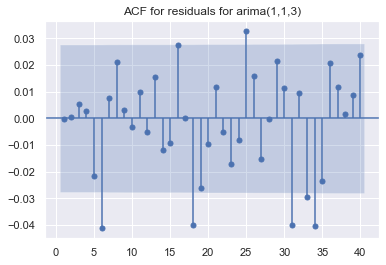

In [55]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], adjusted=True, zero=False, lags=40)
plt.title("ACF for residuals for arima(1,1,3)")
plt.show()

In [56]:
# The 6th lags is highly significant, so we need to check all the models from 1,1,1 to 6,1,6

In [57]:
# Only the ARIMA(6,1,3) and 5,1,1 proved to be better

In [58]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value,order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()
# print(results_ar_6_i_1_ma_3.summary())

model_ar_5_i_1_ma_1 = ARIMA(df.market_value,order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
# print(results_ar_5_i_1_ma_1.summary())

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [59]:
print("ARIMA (1,1,3) ","Log-likelihood",results_ar_1_i_1_ma_3.llf,"AIC",results_ar_1_i_1_ma_3.aic,end="\n\n")
print("ARIMA (6,1,3) ","Log-likelihood",results_ar_6_i_1_ma_3.llf,"AIC",results_ar_6_i_1_ma_3.aic,end="\n\n")
print("ARIMA (5,1,1) ","Log-likelihood",results_ar_5_i_1_ma_1.llf,"AIC",results_ar_5_i_1_ma_1.aic,end="\n\n")

ARIMA (1,1,3)  Log-likelihood -27590.424032543557 AIC 55192.84806508711

ARIMA (6,1,3)  Log-likelihood -27581.45547818475 AIC 55184.9109563695

ARIMA (5,1,1)  Log-likelihood -27586.51188810925 AIC 55189.0237762185



In [60]:
# 6,1,3 is better

In [61]:
#------------------WRONG not nested---------------------#
# print("LLR Test for ARIMA(1,1,3) and ARIMA(5,1,1) :",LLR_test(model_ar_1_i_1_ma_3,model_ar_5_i_1_ma_1,df=2))
# print("LLR Test for ARIMA(5,1,1) and ARIMA(6,1,3) :",LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3,df=3))
#------------------WRONG not nested---------------------#

print("LLR Test for ARIMA(1,1,3) and ARIMA(6,1,3) :",LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3,df=5))

LLR Test for ARIMA(1,1,3) and ARIMA(6,1,3) : 0.003


In [62]:
print("LLR Test for ARIMA(5,1,1) and ARIMA(6,1,3) :",LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3,df=3))

LLR Test for ARIMA(5,1,1) and ARIMA(6,1,3) : 0.018


C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


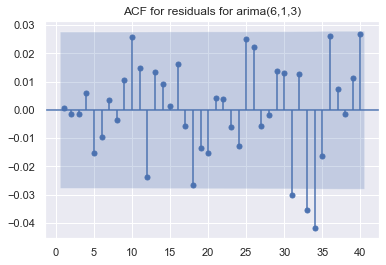

In [63]:
df['res_ar_6_i_1_ma_3'] = results_ar_6_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_6_i_1_ma_3[1:], adjusted=True, zero=False, lags=40)
plt.title("ACF for residuals for arima(6,1,3)")
plt.show()

In [64]:
# according to the course 5,1,1 is better 6,1,3 so they'll go for 511

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


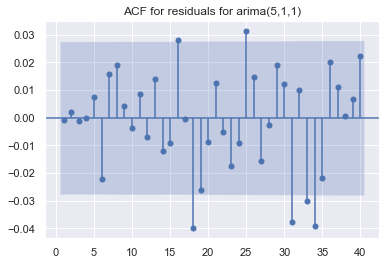

In [65]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], adjusted=True, zero=False, lags=40)
plt.title("ACF for residuals for arima(5,1,1)")
plt.show()

In [66]:
# Models with higher level of integration

In [67]:
# * We rely on integration, when our time-series doesn't come from a stationary process

In [68]:
# How do we know if the integrated data set in stationary?
# > 1. Manually create an integrated version of the original time-series
# > 2. Use the augmented Dickey-Fuller test

In [69]:
# ARMA(P,Q) for integrated prices and an ARIMA(P,1,Q) for prices.
# : ARIMA(1,1,1) -> ARMA(1,1)
# : ARIMA(1,0,1) is equivalent to an ARMA(1,1)

In [70]:
df['delta_prices'] = df.market_value.diff(1)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:],order=(1,0,1))
results_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 05 Apr 2021   AIC                          55215.333
Time:                        12:26:34   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5656      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.651      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.377      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3379           +0.0000j            1.3379            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [72]:
# This result is identicle to arima(1,1,1) we fitted earlier

In [73]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570747,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [74]:
# This is confirmation of stationarity, we don't need more levels of integration, hence
# it is not recommended. 

In [75]:
# The more layers of integration we add, the harder it is to interpret the results

In [76]:
# In practice we harly rely on more levels of integration, and the prices depends on many factors
# so, we will use another better model called MAX models,

In [77]:
# A model that takes into account more than just past prices or past residuals called MAX
# models, 
# ARMAX - Not-integrated
# ARIMAX - integrated

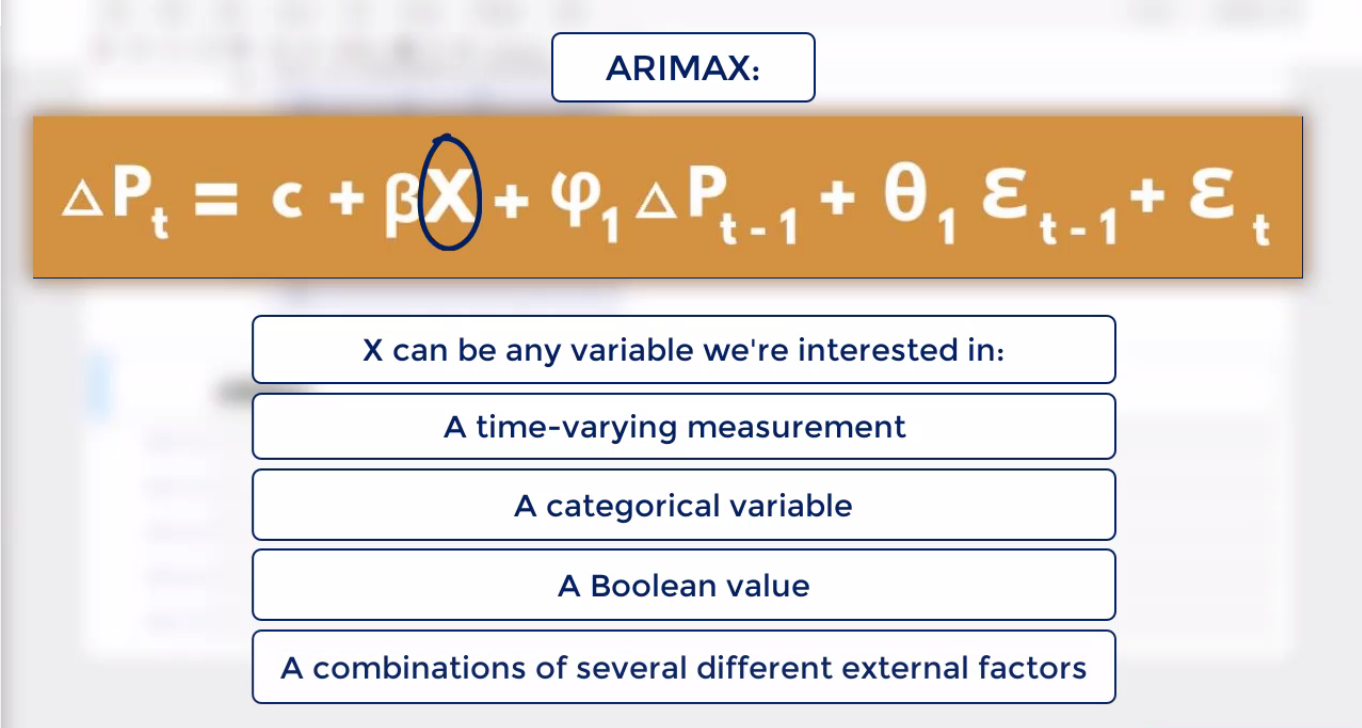

In [79]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value,exog=df.spx,order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Mon, 05 Apr 2021   AIC                          55217.112
Time:                        12:27:05   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5893      2.655     -0.222      0.824      -5.792       4.614
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7462      0.070     10.601      0.000       0.608       0.884
ma.L1.D.market_value    -0.7922      0.064    -12.304      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3401           +0.0000j            1.3401            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
## There are seasonal counterparts of the models we have studied so far.
# 1. Sarma
# 2. Sarima
# 3. Sarimax

In [ ]:
# SARIMAX (p,d,q)(P,D,Q,s)
# caps P,D,Q are seasional orders of regular p,d,q,
# s: The number of periods nedded to pass before the tendency reappears
# if s=1, no seasonality and the pattern is auto-correlation

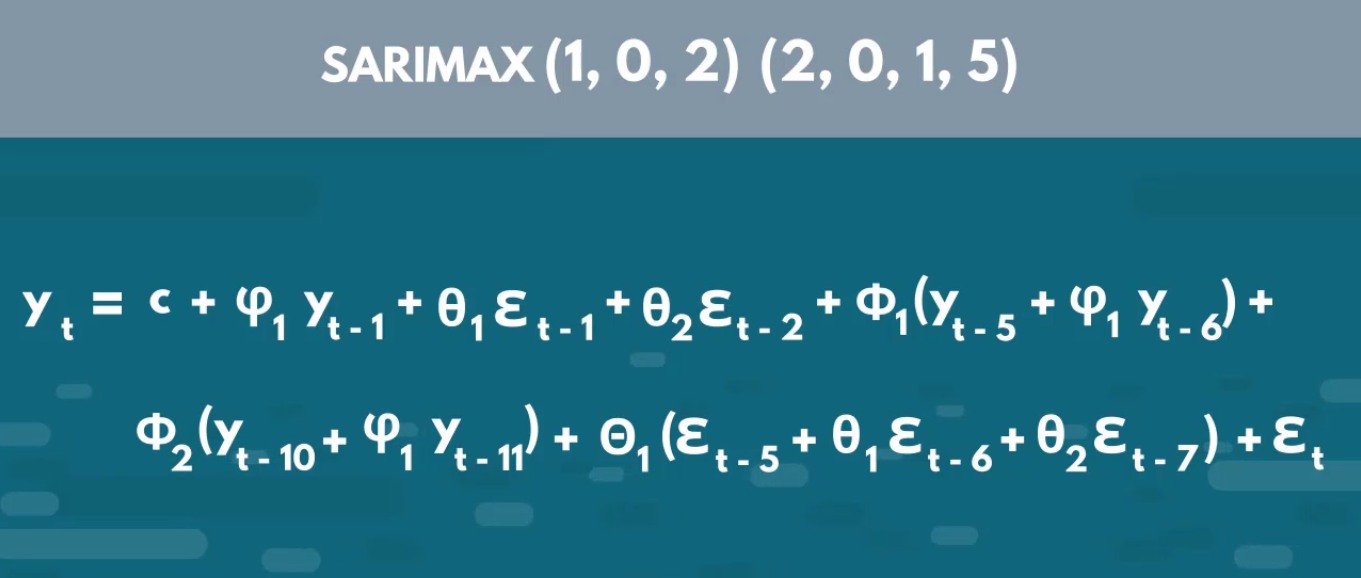

In [80]:
# P + Q + p + q = 6

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
model_sarimax = SARIMAX(df.market_value,exog=df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.721
Date:                           Mon, 05 Apr 2021   AIC                          53439.442
Time:                                   13:30:20   BIC                          53485.092
Sample:                               01-07-1994   HQIC                         53455.438
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7098      0.035     76.573      0.000       2.640       2.779
ar.L1          0.9998      0.000   2074.770      0.000       0.999       1.001
ma.L1         -0.3121      0.010    -32.842      0.000      -0.331      -0.294
ar.S.L5        0.9648      0.010     93.994      0.000       0.945       0.985
ar.S.L10       0.0348      0.009      3.675      0.000       0.016       0.053
ma.S.L5       -0.9986      0.006   -179.146      0.000      -1.010      -0.988
sigma2      2443.6014     28.318     86.293      0.000    2388.100    2499.103
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):              4203.54
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Now let's dicuss volatility(similar to variance), 
# which is the magnitude of the residuals, epsilon_t